# Começaremos importando as bibliotescas necessarias para começar o prejeto

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 

após importar as bibliotecas, começamos lendo os dados da planilha para a variavel data

In [2]:
data = pd.read_csv(r"C:\Users\vinic\OneDrive\Área de Trabalho\train.csv")

Checamos a variavel data para ver se os dados estão corretos

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)        #Transformamos a variavel data em uma lista 
m, n = data.shape            #Obtém as dimensões da lista data
np.random.shuffle(data)      #Embaralha os elementos da lista data

In [5]:
data_dev = data[0:1000].T    #Atribui os primeiros 1000 elementos da lista data à variável data_dev. O método .T é usado para transpor a lista data, o que significa que as linhas e as colunas são trocadas.
Y_dev = data_dev[0]          #Atribui o primeiro elemento da lista data_dev à variável Y_dev.Este elemento é a etiqueta correspondente aos dados de treinamento.
X_dev = data_dev[1:n]        #Atribui os elementos restantes da lista data_dev à variável X_dev.
X_dev = X_dev / 255.         #Divide cada elemento da lista X_dev por 255. Isto é feito para normalizar os dados de treinamento, o que significa que todos os dados são colocados na mesma escala.

In [6]:
data_train = data[1000:m].T  # Atribui os elementos da lista data a partir do índice 1000 até o final à variável data_train.
                             # O método `.T` é usado para transpor a lista data, o que significa que as linhas e as colunas são trocadas.
Y_train = data_train[0]      # Atribui o primeiro elemento da lista data_train à variável Y_train. Este elemento é a etiqueta correspondente aos dados de treinamento.
X_train = data_train[1:n]    # Atribui os elementos restantes da lista data_train à variável X_train. Estes elementos são os dados de treinamento.
X_train = X_train / 255.     # Divide cada elemento da lista X_train por 255. Isto é feito para normalizar os dados de treinamento, o que significa que todos os dados são colocados na mesma escala
_,m_train = X_train.shape    # Obtém as dimensões da lista X_train. A variável _ é um marcador de posição que não é usado.

In [7]:
Y_train

array([2, 1, 5, ..., 4, 3, 3], dtype=int64)

In [8]:
def init_params():                        # Inicia os parametros deste modelo 
    W1 = np.random.rand(10, 784) - 0.5    # Peso da primeira camada
    b1 = np.random.rand(10, 1) - 0.5      # Viés da priimeira camada
    W2 = np.random.rand(10, 10) - 0.5     # Peso da segunda camada
    b2 = np.random.rand(10, 1) - 0.5      # Viés da segunda camdad
    return W1, b1, W2, b2

In [9]:
def ReLU(Z):                         # Aplica a função ReLU à matriz Z.
    return np.maximum(Z, 0)          # A: Uma matriz de números reais, onde os valores negativos em Z são substituídos por 0

In [10]:
def softmax(Z):                      # Aplica a função softmax à matriz Z.
    A = np.exp(Z) / sum(np.exp(Z))   # A: Uma matriz de números reais, onde cada linha representa 
    return A                         # a probabilidade de um dos valores de saída da rede neural.

In [11]:
def forward_prop(W1, b1, W2, b2, X):     # Executa a propagação para frente da rede neural.
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2 
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [12]:
def ReLU_deriv(Z):                   # Calcula a derivada da função ReLU.
    return Z > 0                     # A: Uma matriz de números reais, onde os valores negativos em Z são substituídos por 0.
                                     # A função ReLU_deriv() calcula a derivada da função ReLU. 
                                     # A derivada da função ReLU é uma função que calcula a taxa de mudança da função ReLU em 
                                # um determinado ponto. A função ReLU_deriv() calcula a derivada da função ReLU para a matriz Z.

In [13]:
def one_hot(Y):                                 # Cria uma matriz one-hot para as etiquetas Y.
    one_hot_Y = np.zeros((Y.size, Y.max()+1))   # Y: Uma matriz de números inteiros, representando as etiquetas.
    one_hot_Y[np.arange(Y.size), Y] = 1         # one_hot_Y: Uma matriz de números reais, onde cada linha representa 
    one_hot_Y = one_hot_Y.T                     # a representação one-hot de uma etiqueta.
    return one_hot_Y

In [14]:
def backward_prop(Z1, A1,Z2, A2, W1, W2, X, Y):   # Backward propagation do modelo     # dW1: Os gradientes dos pesos da primeira camada.
    one_hot_Y = one_hot(Y)                        # Z1: Saida da primeira camada       # db1: Os gradientes dos vieses da primeira camada.
    dZ2 = A2 - one_hot_Y                          # A1: Ativação da primeira camada.   # dW2: Os gradientes dos pesos da segunda camada.
    dW2 = 1 / m * dZ2.dot(A1.T)                   # Z2: Saida da segunda camada.       # db2: Os gradientes dos vieses da segunda camada.
    db2 = 1 / m *np.sum(dZ2)                      # A2: Ativação da segunda camada.  
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)          # W1: Pesos da primeira camada.       
    dW1 = 1 / m * dZ1.dot(X.T)                    # W2: Pesos da segunda camada.      
    db1 = 1 / m * np.sum(dZ1)                     # X: Entrada de dados.                 
    return dW1, db1, dW2, db2                     # Y: As etiquetas de verdade.

In [15]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):     # Alpha: A taxa de aprendizagem.
    W1 = W1 - alpha * dW1                                         # W1: Os pesos da primeira camada atualizados.
    b1 = b1 - alpha * db1                                         # W2: Os pesos da segunda camada atualizados.
    W2 = W2 - alpha * dW2                                         # b1: Os vieses da primeira camada atualizados.
    b2 = b2 - alpha * db2                                         # b2: Os vieses da segunda camada atualizados.
    return W1, b1, W2, b2

In [16]:
def get_predictions(A2):         # Retorna as previsões da rede neural.
    return np.argmax(A2, 0)      # predictions: Uma matriz de números inteiros, representando as previsões da rede neural.

def get_accuracy(predictions, Y): # Calcula a acurácia da rede neural.
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size  # accuracy: Um número real, representando a acurácia da rede neural 

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range (iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if 1 % 10 == 0:
            print("iterarion = ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

In [18]:
def make_predictions(X, W1, b1, W2, b2):            # Retorna as previsões da rede neural.
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)   # X: A matriz de entrada.  # W1: A matriz de pesos da primeira camada.
    predictions = get_predictions(A2)               # b1:Os vieses da primeira camada. # W2:A matriz de pesos da segunda camada.
    return predictions                              # b2: Os vieses da segunda camada.
                                                    # predictions: Uma matriz de números inteiros, representando as previsões da
                                                    # rede neural.    
        
def test_prediction(index, W1, b1, W2, b2):         # Imprime a previsão da rede neural para um exemplo de teste.
    current_image = X_train[:, index, None]         # index: O índice do exemplo de teste. 
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()                                           

Prediction:  [2]
Label:  2


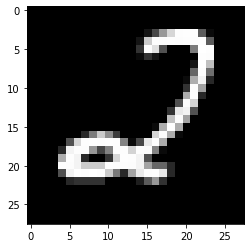

Prediction:  [1]
Label:  1


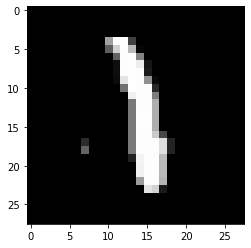

Prediction:  [8]
Label:  5


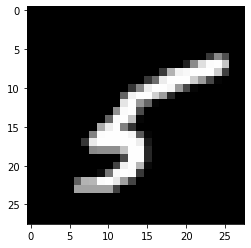

Prediction:  [8]
Label:  8


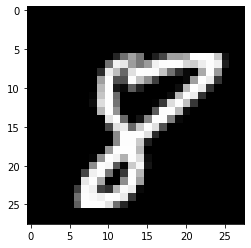

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [20]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 8 1 0 1 6 2 2 8 3 9 3 9 1 7 5 3 8 1 4 9 0 2 0 4 8 9 1 7 7 2 5 2 1 5 6 0
 8 8 1 7 0 2 0 9 4 2 1 5 2 4 0 4 9 1 8 2 9 2 0 6 0 4 2 4 5 1 5 3 6 0 3 4 0
 2 4 5 0 8 2 9 0 4 3 8 7 7 5 4 6 4 7 6 4 6 0 3 3 3 2 4 1 0 5 3 0 6 2 6 7 2
 5 0 1 3 1 1 5 2 7 5 0 8 8 7 8 7 2 5 1 1 7 2 2 1 5 7 7 8 0 0 4 2 5 9 6 8 1
 1 8 7 0 5 6 1 6 3 0 7 8 7 5 4 6 2 1 6 4 4 5 8 3 5 6 8 8 0 6 0 5 1 9 8 4 9
 1 6 1 9 0 7 2 4 4 3 8 8 8 9 5 7 5 4 1 8 3 9 7 7 4 6 6 0 3 1 2 9 5 2 7 2 8
 4 8 9 2 0 4 3 8 4 3 6 5 2 4 7 4 5 6 2 6 9 2 8 2 2 4 1 5 9 1 8 9 9 2 5 2 2
 7 4 1 3 9 6 8 7 5 5 0 5 4 3 1 2 8 6 0 9 2 3 9 9 2 3 5 6 3 7 6 7 1 1 3 6 1
 9 3 6 5 9 4 2 4 5 5 2 1 7 1 1 1 9 3 1 6 5 0 7 4 3 1 0 1 8 5 3 1 8 0 1 3 9
 9 9 4 8 2 9 2 0 9 8 4 6 6 2 4 9 1 9 0 2 6 5 4 5 2 8 5 8 3 1 4 7 1 0 0 2 7
 2 6 0 9 3 5 4 1 1 8 1 5 3 9 4 0 7 5 3 7 4 7 4 8 4 4 5 5 1 0 4 1 1 9 8 5 1
 8 3 6 4 3 0 0 8 8 4 1 9 1 3 0 6 1 1 1 8 7 4 5 0 4 7 7 6 5 3 0 5 3 8 9 4 1
 3 2 8 4 2 3 3 1 5 7 8 0 1 2 2 7 4 7 4 2 1 1 3 2 8 2 3 3 8 8 2 8 7 9 4 2 6
 3 6 9 4 9 1 7 8 9 7 9 6 

0.851